In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [2]:
dataset = "politician"
df_name = "politician_cluster_influencer.csv"

In [3]:
df_means = pd.read_csv("master/outputs/cluster_means/%s_means.csv"%dataset)
df_emb = pd.read_csv("master/outputs/embeddings/%s_embedding.csv"%dataset)
df_edges = pd.read_csv("master/data/%s_edges.csv"%dataset, index_col="node_1")
df_emb.shape

(5908, 16)

In [4]:
with open('master/outputs/assignments/%s.json'%dataset) as json_file:  
    labels = json.load(json_file)
    
df_label = pd.DataFrame({"index" : list(labels.keys()), "label" : list(labels.values())})
df_label["index"] = df_label["index"].astype(int)
df_label = df_label.set_index("index")
df_label = df_label.sort_index()
print(df_label.shape)
df_label.head()

(5908, 1)


,label
index,
0,1
1,5
2,7
3,12
4,10


#### 2D Scatter

Text(0, 0.5, 'component 2')

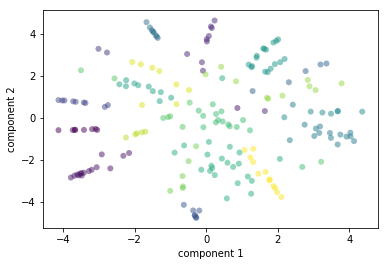

In [5]:
n_points = 200
mds = MDS(n_components=2)
emb_transformed = mds.fit_transform(df_emb[:n_points])
emb_transformed.shape

plt.scatter(emb_transformed[:, 0], emb_transformed[:, 1],
            c=df_label[:n_points].label, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
# plt.colorbar();

#### 3D Scatter

In [6]:
n_points = 5000

mds = MDS(n_components=3)
emb_transformed = mds.fit_transform(df_emb[:n_points])
emb_transformed.shape

(5000, 3)

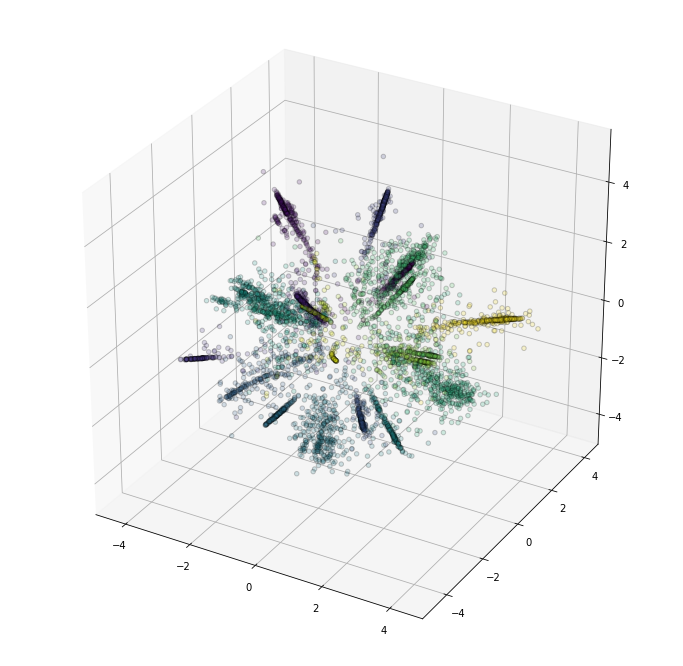

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(emb_transformed[:, 0], emb_transformed[:, 1], emb_transformed[:, 2],
            c=df_label[:n_points].label, edgecolor='none', alpha=0.2)